In [1]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load the dataset
file_path = 'data.csv'  
data = pd.read_csv(file_path, encoding='ISO-8859-1')


# Step 3: Check the first few rows to confirm the data has loaded correctly
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.describe

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custo

In [5]:
# Check the size of the dataset
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

# Display information about each column (e.g., data types and null counts)
data.info()

# Display summary statistics for numeric columns
data.describe()

Number of rows: 541909
Number of columns: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Preprocessing:

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Drop rows with missing values (if appropriate) or fill them based on context
# For instance, here we drop rows with any missing values
data.dropna(inplace=True)  # Modify this based on your project's requirements

Missing values in each column:
Description      1454
CustomerID     135080
dtype: int64


In [10]:
# Convert 'InvoiceDate' column to datetime if it exists
if 'InvoiceDate' in data.columns:
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [12]:
# Remove duplicate rows if there are any
data.drop_duplicates(inplace=True)


In [14]:
# Filter out rows where Quantity or Price are zero or negative, if applicable
if 'Quantity' in data.columns and 'Price' in data.columns:
    data = data[(data['Quantity'] > 0) & (data['Price'] > 0)]

In [16]:
# Display the first few rows after preprocessing
data.head()

# Check the dataset's final shape after cleaning
print(f"Dataset shape after cleaning: {data.shape}")


Dataset shape after cleaning: (401604, 8)


# 2. RFM Calculation:

In [19]:
import pandas as pd

# Assuming 'data' is your preprocessed DataFrame from the previous steps
# Let's inspect the data to identify the columns we need for RFM calculations
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
# Convert 'InvoiceDate' to datetime format if not already done
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Set a reference date for calculating Recency (typically the day after the last purchase)
reference_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)
print("Reference date for Recency calculation:", reference_date)

Reference date for Recency calculation: 2011-12-10 12:50:00


In [23]:
# Calculate RFM Metrics

In [25]:
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency: count of unique invoices/orders
    'Quantity': lambda x: (x * data['UnitPrice']).sum()  # Monetary: sum of all purchases
})

# Rename columns for clarity
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Display the RFM table
rfm.reset_index(inplace=True)
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [27]:
# Filter out rows where Monetary value is zero or negative
rfm = rfm[rfm['Monetary'] > 0]
rfm.head()


,CustomerID,Recency,Frequency,Monetary
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
5,12352.0,36,11,1545.41


In [29]:
# Recency (R):

In [31]:
import pandas as pd

# Load the dataset
# Assuming your data has already been loaded and preprocessed
# Ensure the InvoiceDate is in datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Step 1: Define the reference date as the day after the last purchase
reference_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

# Step 2: Calculate Recency
# Group by CustomerID and calculate the days since the last purchase
recency = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days  # Calculate Recency
}).reset_index()

# Rename the column for clarity
recency.columns = ['CustomerID', 'Recency']

# Display the Recency DataFrame
print(recency.head())

   CustomerID  Recency
0     12346.0      326
1     12347.0        2
2     12348.0       75
3     12349.0       19
4     12350.0      310


In [33]:
# Frequency (F):

In [35]:
import pandas as pd
# Step 1: Calculate Frequency
# Group by CustomerID and count the unique InvoiceNo entries for each customer
frequency = data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique'  # Count unique orders for each customer
}).reset_index()

# Step 2: Rename the column for clarity
frequency.columns = ['CustomerID', 'Frequency']

# Display the Frequency DataFrame
print(frequency.head())

   CustomerID  Frequency
0     12346.0          2
1     12347.0          7
2     12348.0          4
3     12349.0          1
4     12350.0          1


In [37]:
# Monetary (M): 

In [39]:
import pandas as pd
# Step 1: Calculate the Monetary value
# This assumes your DataFrame has columns 'Quantity' and 'UnitPrice'

data['TotalPrice'] = data['Quantity'] * data['UnitPrice']  # Calculate total price for each transaction

# Step 2: Group by CustomerID and sum the TotalPrice for each customer
monetary = data.groupby('CustomerID').agg({
    'TotalPrice': 'sum'  # Sum of all purchases for each customer
}).reset_index()

# Step 3: Rename the column for clarity
monetary.columns = ['CustomerID', 'Monetary']

# Display the Monetary DataFrame
print(monetary.head())

   CustomerID  Monetary
0     12346.0      0.00
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40


# 3. RFM Segmentation:

In [42]:
import pandas as pd
# Step 1: Merge RFM DataFrames into a single DataFrame
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')

# Step 2: Assign RFM Scores based on quartiles
# Define a function to calculate scores
def rfm_score(x, column):
    if x <= column[0]:
        return 4  
    elif x <= column[1]:
        return 3
    elif x <= column[2]:
        return 2
    else:
        return 1  

# Calculate quantiles for each metric
r_value_quantiles = rfm['Recency'].quantile([0.25, 0.5, 0.75]).values
f_value_quantiles = rfm['Frequency'].quantile([0.25, 0.5, 0.75]).values
m_value_quantiles = rfm['Monetary'].quantile([0.25, 0.5, 0.75]).values

# Step 3: Assign scores to Recency, Frequency, and Monetary
rfm['R_Score'] = rfm['Recency'].apply(lambda x: rfm_score(x, r_value_quantiles))
rfm['F_Score'] = rfm['Frequency'].apply(lambda x: rfm_score(x, f_value_quantiles))
rfm['M_Score'] = rfm['Monetary'].apply(lambda x: rfm_score(x, m_value_quantiles))

# Step 4: Combine RFM Scores into a single RFM score
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

# Display the final RFM DataFrame with scores
print(rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']].head())


   CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0     12346.0      326          2      0.00        1        3        4   
1     12347.0        2          7   4310.00        4        1        1   
2     12348.0       75          4   1797.24        2        2        1   
3     12349.0       19          1   1757.55        3        4        1   
4     12350.0      310          1    334.40        1        4        3   

   RFM_Score  
0          8  
1          6  
2          5  
3          8  
4          8  


In [44]:
import pandas as pd
# Step 1: Combine RFM Scores into a single RFM score
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']
def rfm_segment(rfm_score):
    if rfm_score >= 12:
        return 'High Value'
    elif rfm_score >= 9:
        return 'Medium Value'
    elif rfm_score >= 6:
        return 'Low Value'
    else:
        return 'Very Low Value'

# Step 2: Assign customer segments based on RFM Score
rfm['Segment'] = rfm['RFM_Score'].apply(rfm_segment)

# Step 3: Display the final RFM DataFrame with scores and segments
print(rfm[['CustomerID', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'Segment']].head())

   CustomerID  R_Score  F_Score  M_Score  RFM_Score         Segment
0     12346.0        1        3        4          8       Low Value
1     12347.0        4        1        1          6       Low Value
2     12348.0        2        2        1          5  Very Low Value
3     12349.0        3        4        1          8       Low Value
4     12350.0        1        4        3          8       Low Value


# 4. Customer Segmentation:

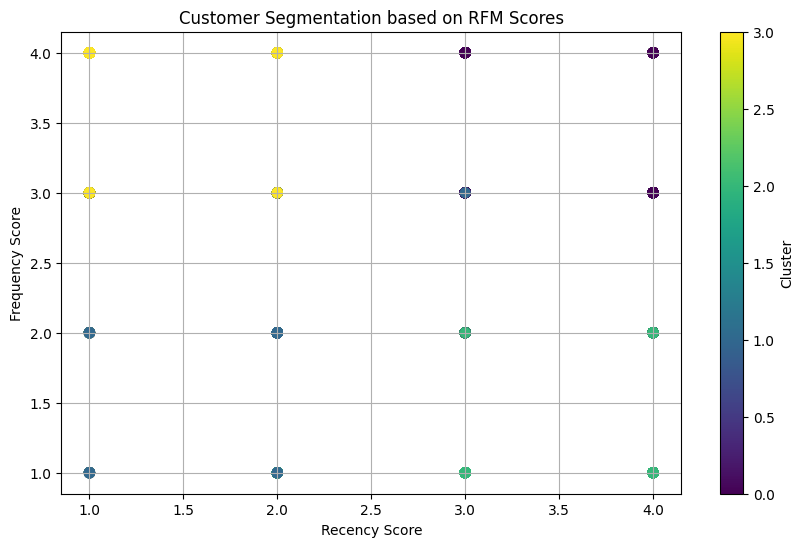

   CustomerID  R_Score  F_Score  M_Score  RFM_Score  Cluster
0     12346.0        1        3        4          8        3
1     12347.0        4        1        1          6        2
2     12348.0        2        2        1          5        1
3     12349.0        3        4        1          8        1
4     12350.0        1        4        3          8        3


In [47]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'rfm' DataFrame is already prepared with R_Score, F_Score, M_Score, and RFM_Score

# Step 1: Prepare the data for clustering
X = rfm[['R_Score', 'F_Score', 'M_Score']]

# Step 2: Standardize the RFM scores
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means clustering
# Choosing the number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)  # Change n_clusters based on your needs
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Analyze and visualize the clustering results
# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(rfm['R_Score'], rfm['F_Score'], c=rfm['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segmentation based on RFM Scores')
plt.xlabel('Recency Score')
plt.ylabel('Frequency Score')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# Display the first few rows with Cluster information
print(rfm[['CustomerID', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'Cluster']].head())


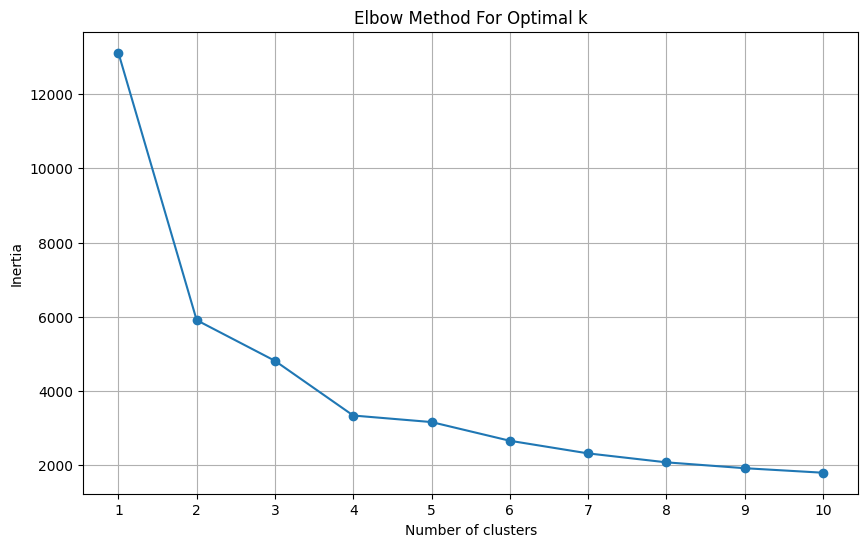

In [49]:
import matplotlib.pyplot as plt

# Step 1: Initialize a list to hold the inertia values
inertia = []

# Step 2: Experiment with different numbers of clusters (e.g., 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Step 3: Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

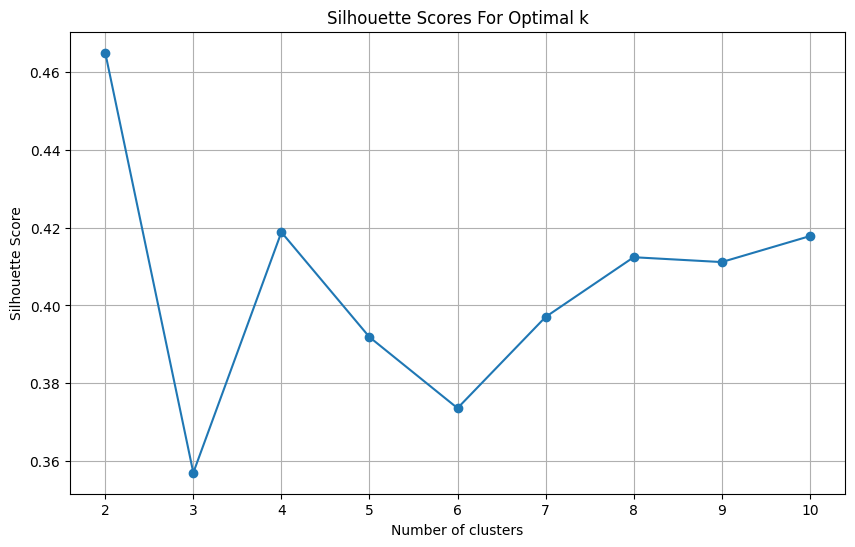

In [51]:
from sklearn.metrics import silhouette_score

# Step 1: Initialize a list to hold the silhouette scores
silhouette_scores = []

# Step 2: Experiment with different numbers of clusters
for k in range(2, 11):  # Start from 2 because silhouette score is undefined for a single cluster
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Step 3: Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show()


In [54]:
# Using the optimal number of clusters determined from the previous steps
k_opt = 4  
kmeans = KMeans(n_clusters=k_opt, random_state=0)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the final RFM DataFrame with clusters
print(rfm.head())

   CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0     12346.0      326          2      0.00        1        3        4   
1     12347.0        2          7   4310.00        4        1        1   
2     12348.0       75          4   1797.24        2        2        1   
3     12349.0       19          1   1757.55        3        4        1   
4     12350.0      310          1    334.40        1        4        3   

   RFM_Score         Segment  Cluster  
0          8       Low Value        2  
1          6       Low Value        1  
2          5  Very Low Value        0  
3          8       Low Value        0  
4          8       Low Value        2  


# 5. Segment Profiling:

In [56]:
# Step 1: Group the RFM DataFrame by cluster and calculate average RFM scores
segment_profiles = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean',
    'CustomerID': 'count'  # Count the number of customers in each segment
}).reset_index()

# Rename the columns for better understanding
segment_profiles.columns = ['Cluster', 'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary',
                             'Avg_R_Score', 'Avg_F_Score', 'Avg_M_Score', 'Customer_Count']

# Display the segment profiles
print(segment_profiles)

   Cluster  Avg_Recency  Avg_Frequency  Avg_Monetary  Avg_R_Score  \
0        0   140.058190       3.038793   1056.504916     1.602371   
1        1    22.034459      11.312940   4652.433404     3.453586   
2        2   199.478656       1.243415    218.682272     1.350590   
3        3    23.340934       2.078176    479.428208     3.373507   

   Avg_F_Score  Avg_M_Score  Customer_Count  
0     2.761853     2.240302             928  
1     1.291139     1.349508            1422  
2     3.804723     3.709355            1101  
3     3.259501     3.092291             921  


In [58]:
# Step 2: Analyze and print characteristics of each segment
for index, row in segment_profiles.iterrows():
    print(f"Segment {row['Cluster']}:")
    print(f" - Average Recency: {row['Avg_Recency']:.2f} days")
    print(f" - Average Frequency: {row['Avg_Frequency']:.2f} purchases")
    print(f" - Average Monetary Value: ${row['Avg_Monetary']:.2f}")
    print(f" - Average R Score: {row['Avg_R_Score']:.2f}")
    print(f" - Average F Score: {row['Avg_F_Score']:.2f}")
    print(f" - Average M Score: {row['Avg_M_Score']:.2f}")
    print(f" - Number of Customers in Segment: {row['Customer_Count']}")
    print("\n")  # Add a line break for better readability

Segment 0.0:
 - Average Recency: 140.06 days
 - Average Frequency: 3.04 purchases
 - Average Monetary Value: $1056.50
 - Average R Score: 1.60
 - Average F Score: 2.76
 - Average M Score: 2.24
 - Number of Customers in Segment: 928.0


Segment 1.0:
 - Average Recency: 22.03 days
 - Average Frequency: 11.31 purchases
 - Average Monetary Value: $4652.43
 - Average R Score: 3.45
 - Average F Score: 1.29
 - Average M Score: 1.35
 - Number of Customers in Segment: 1422.0


Segment 2.0:
 - Average Recency: 199.48 days
 - Average Frequency: 1.24 purchases
 - Average Monetary Value: $218.68
 - Average R Score: 1.35
 - Average F Score: 3.80
 - Average M Score: 3.71
 - Number of Customers in Segment: 1101.0


Segment 3.0:
 - Average Recency: 23.34 days
 - Average Frequency: 2.08 purchases
 - Average Monetary Value: $479.43
 - Average R Score: 3.37
 - Average F Score: 3.26
 - Average M Score: 3.09
 - Number of Customers in Segment: 921.0




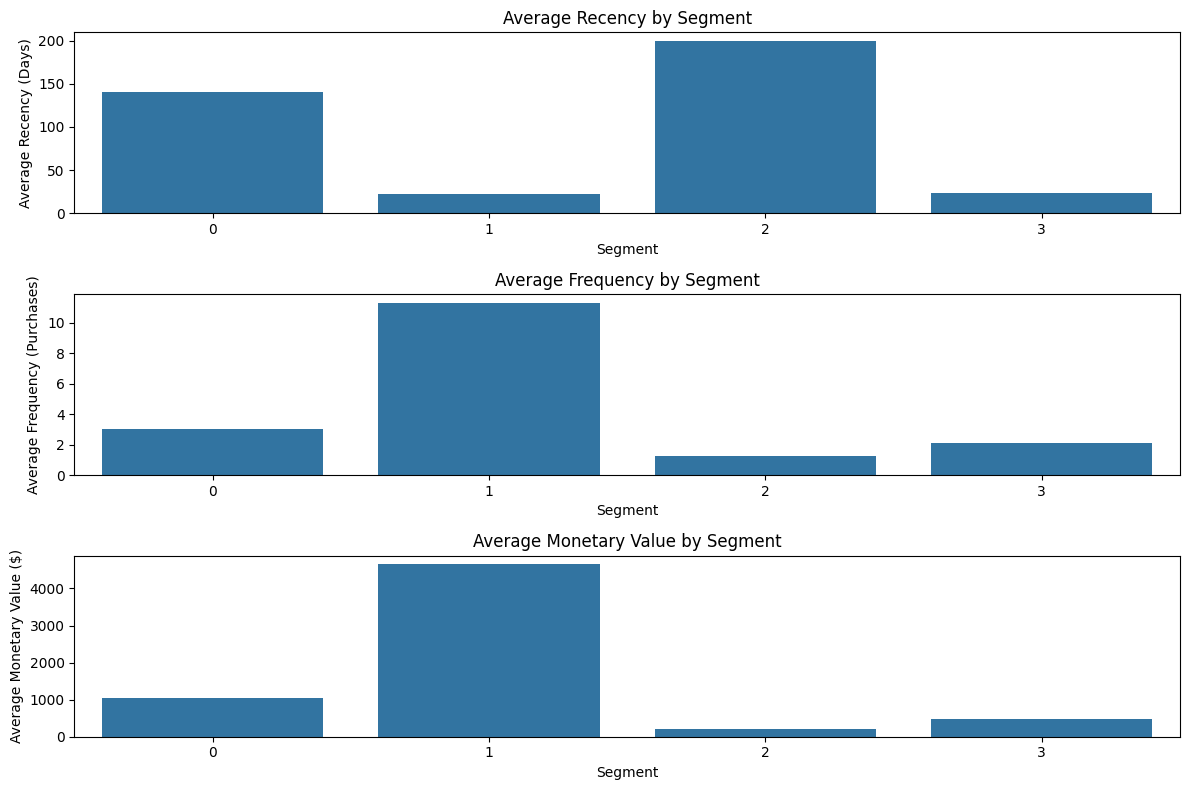

In [60]:
import seaborn as sns

# Step 3: Visualize the Average RFM Scores for Each Segment
plt.figure(figsize=(12, 8))

# Plot Average Recency
plt.subplot(3, 1, 1)
sns.barplot(x='Cluster', y='Avg_Recency', data=segment_profiles)
plt.title('Average Recency by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Recency (Days)')

# Plot Average Frequency
plt.subplot(3, 1, 2)
sns.barplot(x='Cluster', y='Avg_Frequency', data=segment_profiles)
plt.title('Average Frequency by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Frequency (Purchases)')

# Plot Average Monetary Value
plt.subplot(3, 1, 3)
sns.barplot(x='Cluster', y='Avg_Monetary', data=segment_profiles)
plt.title('Average Monetary Value by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Monetary Value ($)')

plt.tight_layout()
plt.show()

# 6. Marketing Recommendations:

In [63]:
import pandas as pd

# Define the marketing recommendations for each customer segment
marketing_recommendations = {
    'Segment': ['High-Value Loyal Customers',
                'Frequent but Low-Spending Customers',
                'New or Inactive Customers',
                'At-Risk Customers',
                'Discount Shoppers'],
    'Characteristics': [
        'High Frequency, High Monetary Value, Low Recency',
        'High Frequency, Low Monetary Value, Moderate Recency',
        'Low Frequency, Low Monetary Value, High Recency',
        'Low Frequency, Low Monetary Value, High Recency',
        'Low Recency, High Sensitivity to Pricing'
    ],
    'Recommendations': [
        '1. Create a tiered loyalty program.\n'
        '2. Provide exclusive offers and early access to new products.\n'
        '3. Use personalized communication to enhance customer experience.',

        '1. Target with upsell and cross-sell strategies.\n'
        '2. Implement engagement campaigns showcasing higher-margin products.\n'
        '3. Offer incentives for higher spending.',

        '1. Send welcome campaigns with educational content.\n'
        '2. Provide limited-time re-engagement offers.\n'
        '3. Request feedback to improve initial experience.',

        '1. Use targeted re-engagement campaigns with enticing offers.\n'
        '2. Reach out for feedback to understand inactivity.\n'
        '3. Engage with valuable content related to past purchases.',

        '1. Create flash sales and limited-time offers.\n'
        '2. Use price promotions tailored to price sensitivity.\n'
        '3. Gather feedback on appealing discount types.'
    ]
}

# Create a DataFrame
recommendations_df = pd.DataFrame(marketing_recommendations)

# Display the recommendations DataFrame
recommendations_df


,Segment,Characteristics,Recommendations
0,High-Value Loyal Customers,"High Frequency, High Monetary Value, Low Recency",1. Create a tiered loyalty program.\n2. Provid...
1,Frequent but Low-Spending Customers,"High Frequency, Low Monetary Value, Moderate R...",1. Target with upsell and cross-sell strategie...
2,New or Inactive Customers,"Low Frequency, Low Monetary Value, High Recency",1. Send welcome campaigns with educational con...
3,At-Risk Customers,"Low Frequency, Low Monetary Value, High Recency",1. Use targeted re-engagement campaigns with e...
4,Discount Shoppers,"Low Recency, High Sensitivity to Pricing",1. Create flash sales and limited-time offers....


# 7. Visualization:

In [ ]:
# 1. Visualizing RFM Distribution

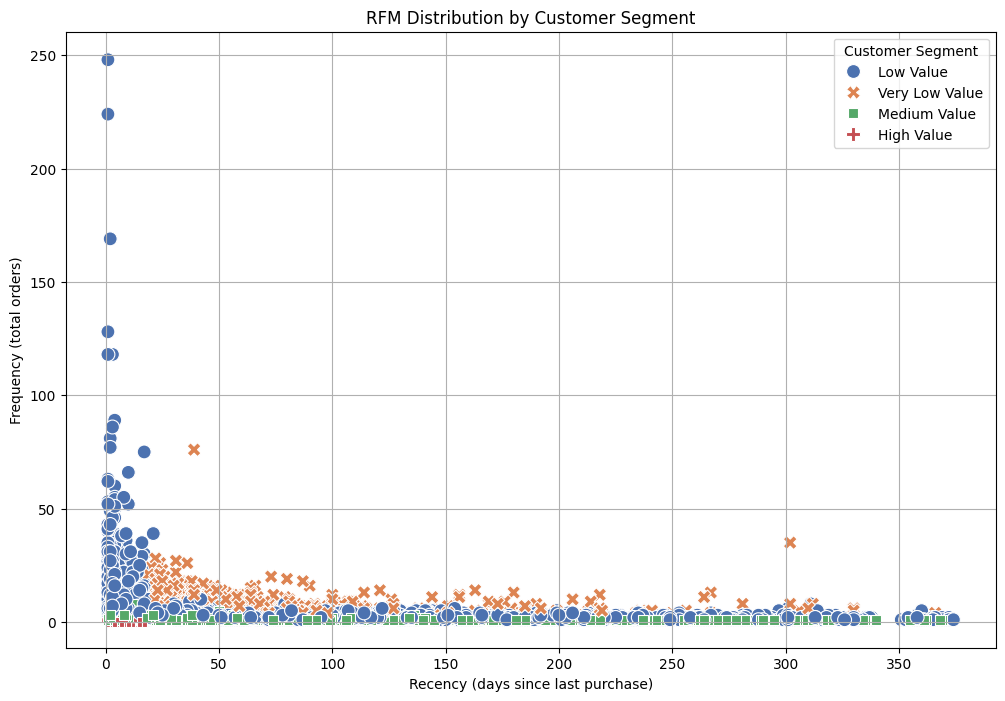

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame 'rfm' containing RFM scores and segments
# Ensure 'rfm' DataFrame includes 'Recency', 'Frequency', 'Monetary', and 'Segment' columns
# Example: rfm = pd.DataFrame({...})

# Scatter plot for RFM metrics
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment', palette='deep', style='Segment', s=100)
plt.title('RFM Distribution by Customer Segment')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Frequency (total orders)')
plt.legend(title='Customer Segment')
plt.grid()
plt.show()


In [68]:
# 2. Visualizing RFM Segment Counts

/var/folders/zf/dtk1s5c56mx5hp7jcj92swhw0000gn/T/ipykernel_31507/273717911.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='pastel')


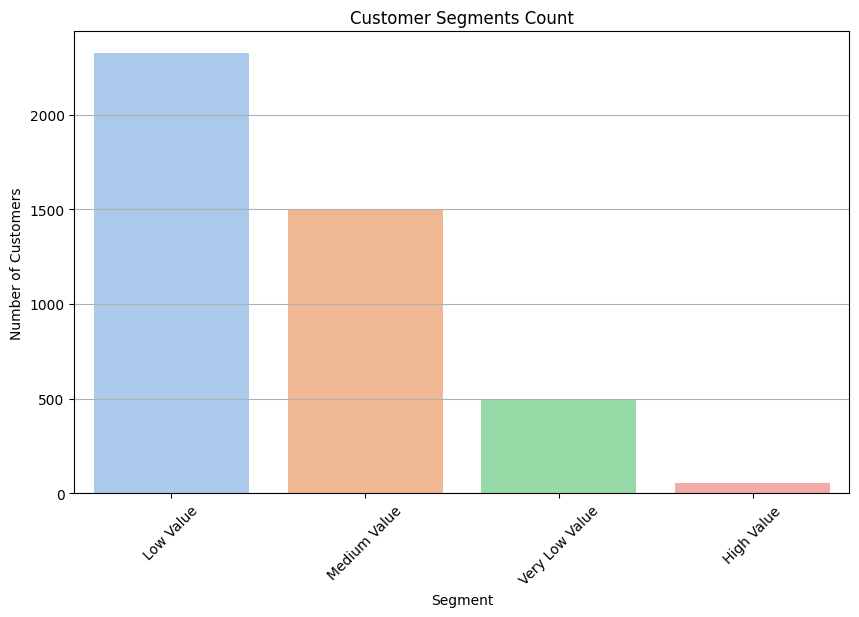

In [70]:
# Count the number of customers in each segment
segment_counts = rfm['Segment'].value_counts()

# Bar chart for segment counts
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='pastel')
plt.title('Customer Segments Count')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [72]:
# 3. Heatmap for RFM Scores

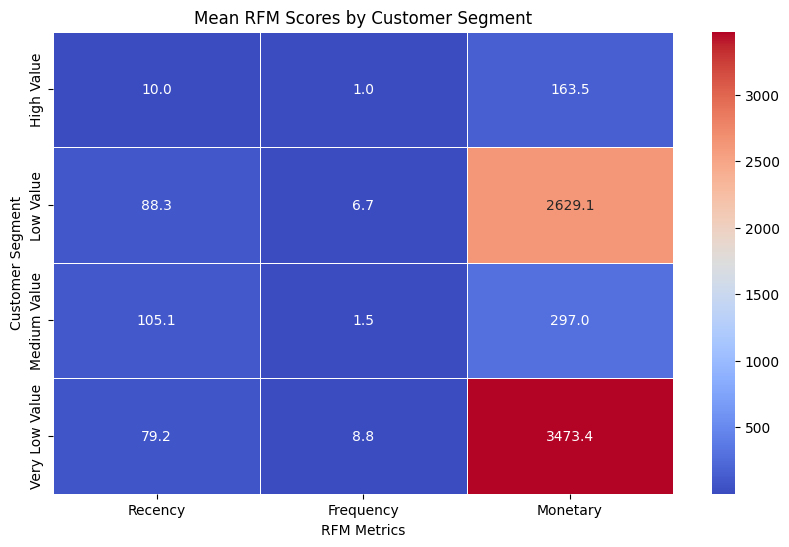

In [74]:
# Calculate the mean RFM scores by segment
mean_rfm = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

# Set the index to Segment for heatmap
mean_rfm.set_index('Segment', inplace=True)

# Heatmap for mean RFM scores
plt.figure(figsize=(10, 6))
sns.heatmap(mean_rfm, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('Mean RFM Scores by Customer Segment')
plt.ylabel('Customer Segment')
plt.xlabel('RFM Metrics')
plt.show()


In [76]:
# 1. Data Overview

In [78]:
dataset_size = data.shape
print(f'The dataset contains {dataset_size[0]} rows and {dataset_size[1]} columns.')


The dataset contains 401604 rows and 9 columns.


In [80]:
# Display general information about the dataset, including column names and data types
print('Dataset Information:')
data.info()

print('\nStatistical Summary of Numerical Columns:')
print(data.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalPrice   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB

Statistical Summary of Numerical Columns:
            Quantity                    InvoiceDate      UnitPrice  \
count  401604.000000                         401604  401604.000000   
mean       12.183273  2011-07-10 12:08:23.848567552       3

In [82]:
# Convert the date column to datetime if it's not already
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Get the min and max dates
start_date = data['InvoiceDate'].min()
end_date = data['InvoiceDate'].max()

print(f'The period covered by the dataset is from {start_date.date()} to {end_date.date()}.')


The period covered by the dataset is from 2010-12-01 to 2011-12-09.


In [84]:
# 2. Customer Analysis

In [86]:
# Assuming 'CustomerID' is the column that identifies unique customers
unique_customers = data['CustomerID'].nunique()
print(f'There are {unique_customers} unique customers in the dataset.')


There are 4372 unique customers in the dataset.


In [88]:
# Get a summary of the dataset
column_descriptions = data.describe(include='all').transpose()
print(column_descriptions)


                count unique                                 top    freq  \
InvoiceNo      401604  22190                              576339     542   
StockCode      401604   3684                              85123A    2065   
Description    401604   3896  WHITE HANGING HEART T-LIGHT HOLDER    2058   
Quantity     401604.0    NaN                                 NaN     NaN   
InvoiceDate    401604    NaN                                 NaN     NaN   
UnitPrice    401604.0    NaN                                 NaN     NaN   
CustomerID   401604.0    NaN                                 NaN     NaN   
Country        401604     37                      United Kingdom  356728   
TotalPrice   401604.0    NaN                                 NaN     NaN   

                                      mean                  min  \
InvoiceNo                              NaN                  NaN   
StockCode                              NaN                  NaN   
Description                           

In [90]:
# 3. Product Analysis

In [112]:
# Calculate total quantity purchased for each product based on 'Description'
top_products = data.groupby('Description')['Quantity'].sum().reset_index()

# Sort by quantity in descending order and get the top 10
top_10_products = top_products.sort_values(by='Quantity', ascending=False).head(10)

# Display the top 10 most frequently purchased products
print("Top 10 Most Frequently Purchased Products:")
print(top_10_products)


Top 10 Most Frequently Purchased Products:
                             Description  Quantity
3805   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
1771             JUMBO BAG RED RETROSPOT     44963
217        ASSORTED COLOUR BIRD ORNAMENT     35215
3716  WHITE HANGING HEART T-LIGHT HOLDER     34128
2279     PACK OF 72 RETROSPOT CAKE CASES     33386
2612                      POPCORN HOLDER     30492
2669                  RABBIT NIGHT LIGHT     27045
2057             MINI PAINT SET VINTAGE      25880
2245          PACK OF 12 LONDON TISSUES      25305
2277  PACK OF 60 PINK PAISLEY CAKE CASES     24129


In [102]:
print(data.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')


In [114]:
# 4. Time Analysis

In [116]:
# Determine Day of the Week and Time of Day When Most Orders Are Placed

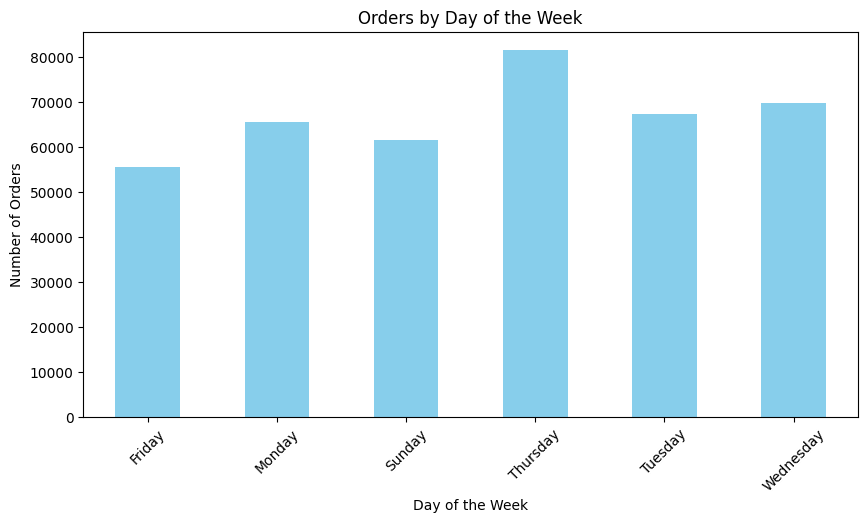

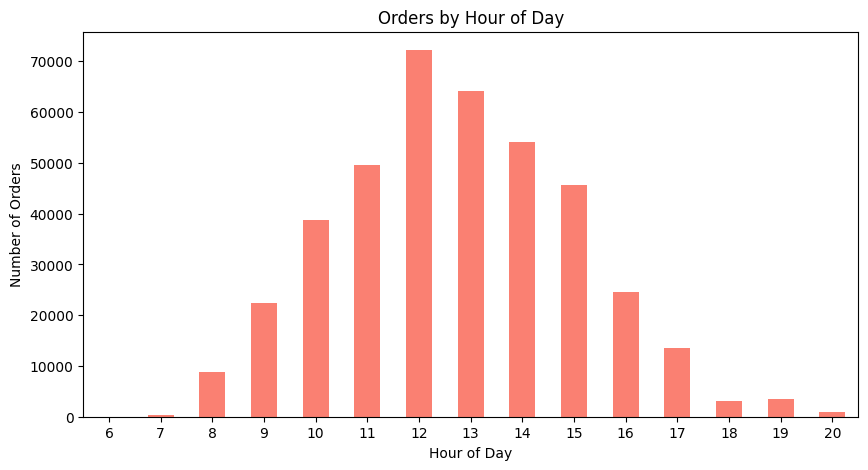

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the date column to datetime if not already done
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract day of the week and hour from the OrderDate column
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
data['HourOfDay'] = data['InvoiceDate'].dt.hour

# Plot distribution of orders by day of the week
plt.figure(figsize=(10, 5))
data['DayOfWeek'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of orders by hour of day
plt.figure(figsize=(10, 5))
data['HourOfDay'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()


In [120]:
# Identify Seasonal Trends

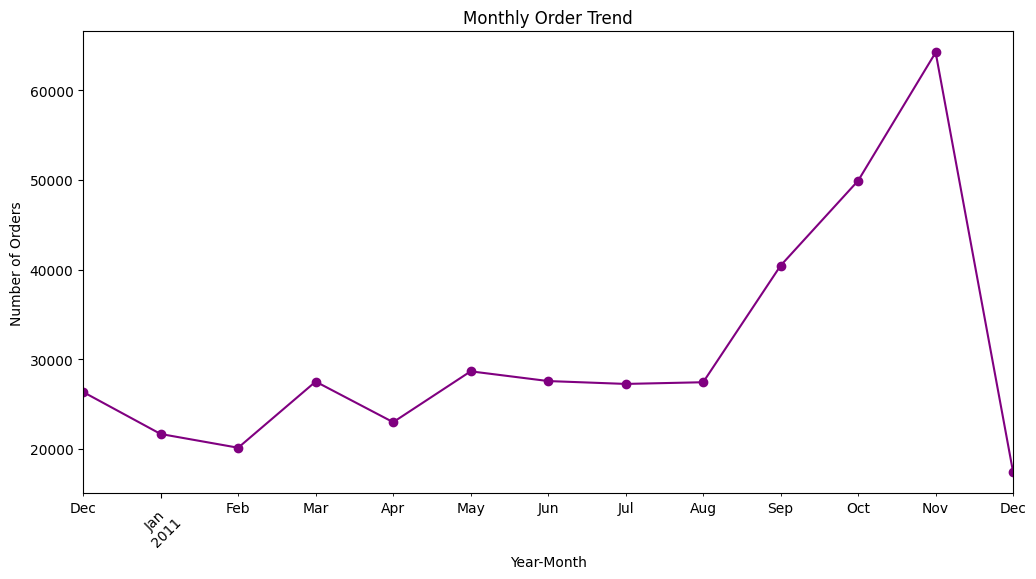

In [122]:
# Extract year and month for seasonal analysis
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# Group by YearMonth to count orders per month
monthly_orders = data.groupby('YearMonth').size()

plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Order Trend')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [124]:
# 5. Geographical Analysis

Top 5 countries by number of orders:
Country
United Kingdom    356728
Germany             9480
France              8475
EIRE                7475
Spain               2528
Name: count, dtype: int64


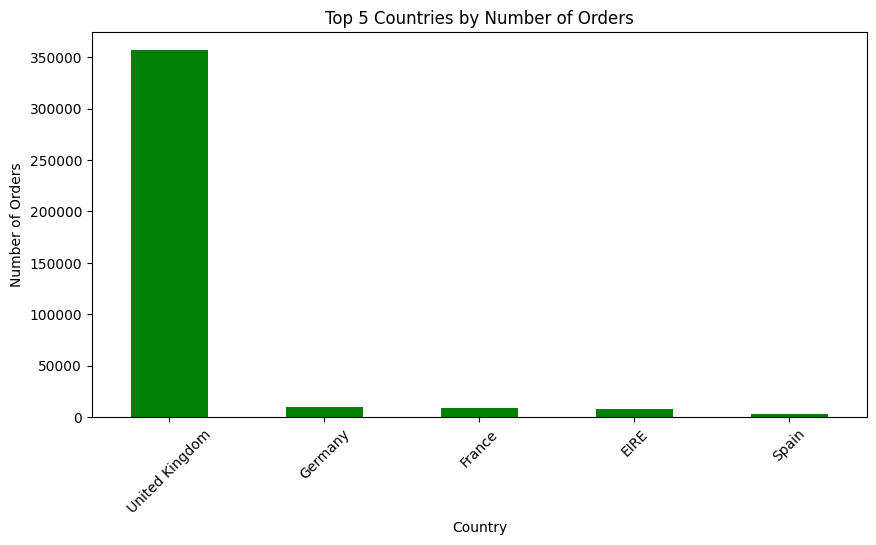

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Country' and count the number of orders
top_countries = data['Country'].value_counts().head(5)

# Display the top 5 countries
print("Top 5 countries by number of orders:")
print(top_countries)

# Plot the top 5 countries
plt.figure(figsize=(10, 5))
top_countries.plot(kind='bar', color='green')
plt.title('Top 5 Countries by Number of Orders')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

Average order value by country:
Country
Singapore    109.645808
Portugal       8.771754
Cyprus         6.350311
Canada         6.030331
Norway         6.012026
Finland        5.448705
Lebanon        5.387556
Malta          5.244173
EIRE           5.111607
France         5.053124
Name: UnitPrice, dtype: float64


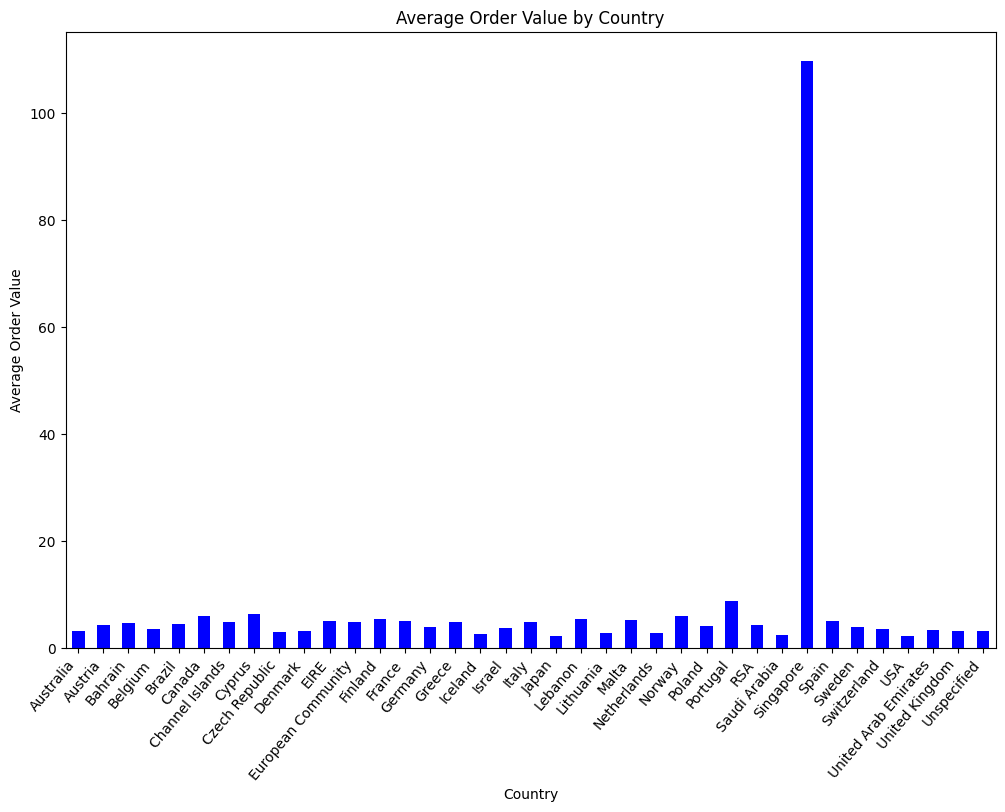

In [128]:
# Calculate the average order value per country
country_avg_order_value = data.groupby('Country')['UnitPrice'].mean()

# Sort and display the top countries with their average order value
print("Average order value by country:")
print(country_avg_order_value.sort_values(ascending=False).head(10))

# Plot the average order value by country
plt.figure(figsize=(12, 8))
country_avg_order_value.plot(kind='bar', color='blue')
plt.title('Average Order Value by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.xticks(rotation=50, ha='right')
plt.show()


In [130]:
# 6. Payment Analysis

In [138]:
# Total orders per customer
customer_orders = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_orders.columns = ['CustomerID', 'TotalOrders']


In [140]:
# Top 5 countries by number of orders
top_countries = data.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).head(5)
print("Top 5 countries by number of orders:")
print(top_countries)


Top 5 countries by number of orders:
Country
United Kingdom    19857
Germany             603
France              458
EIRE                319
Belgium             119
Name: InvoiceNo, dtype: int64


In [142]:
# Average order value per customer
customer_avg_order_value = data.groupby('CustomerID')['TotalPrice'].mean().reset_index()
customer_avg_order_value.columns = ['CustomerID', 'AvgOrderValue']


In [144]:
# 7. Customer Behavior

In [146]:
# Assuming 'CustomerID' identifies each customer and 'OrderDate' contains the date of each order
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])  # Ensure dates are in datetime format

# Calculate the first and last purchase date for each customer
customer_activity = data.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])
customer_activity['ActivityDuration'] = (customer_activity['max'] - customer_activity['min']).dt.days

# Calculate the average duration across all customers
average_activity_duration = customer_activity['ActivityDuration'].mean()
print(f"Average Customer Activity Duration: {average_activity_duration:.2f} days")


Average Customer Activity Duration: 133.39 days


In [148]:
# Example: Using the RFM scores from your previous analysis to define segments
# Assuming your 'rfm' DataFrame includes 'R_Score', 'F_Score', and 'M_Score' columns

# Define customer segments based on RFM scores
def assign_segment(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'High-Value Loyal Customers'
    elif row['F_Score'] >= 4:
        return 'Frequent Purchasers'
    elif row['R_Score'] <= 2 and row['F_Score'] <= 2:
        return 'Long-Term Inactive Customers'
    else:
        return 'Occasional Shoppers'

# Apply the segmentation function
rfm['CustomerSegment'] = rfm.apply(assign_segment, axis=1)

# Display the number of customers in each segment
segment_counts = rfm['CustomerSegment'].value_counts()
print("Customer Segments:")
print(segment_counts)


Customer Segments:
CustomerSegment
Occasional Shoppers             2626
Frequent Purchasers             1258
Long-Term Inactive Customers     433
High-Value Loyal Customers        55
Name: count, dtype: int64


In [150]:
# Calculate average values within each segment
segment_analysis = rfm.groupby('CustomerSegment').agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean'  # if merged with customer_activity DataFrame
})

print("Segment Analysis:")
print(segment_analysis)


Segment Analysis:
                               R_Score   F_Score   M_Score
CustomerSegment                                           
Frequent Purchasers           1.736089  4.000000  3.447536
High-Value Loyal Customers    4.000000  4.000000  4.000000
Long-Term Inactive Customers  1.755196  1.575058  1.836028
Occasional Shoppers           2.980960  2.153846  2.124143


In [152]:
# 8. Returns and Refunds

In [156]:
import pandas as pd

# Calculate total number of orders
total_orders = data['InvoiceNo'].nunique()

# Identify potential returns based on negative quantities
returned_orders = data[data['Quantity'] < 0]['InvoiceNo'].nunique()

# Calculate percentage of orders with returns
returns_percentage = (returned_orders / total_orders) * 100
print(f"Percentage of orders with returns: {returns_percentage:.2f}%")

# Group by product `Description` (or `StockCode` if `Description` is not detailed enough)
# Calculate the number of returns per product category
returns_by_product = data[data['Quantity'] < 0].groupby('Description')['Quantity'].count().reset_index()
returns_by_product.columns = ['Description', 'ReturnCount']

# Merge with total order counts per product to calculate return likelihood
product_counts = data.groupby('Description')['Quantity'].count().reset_index()
product_counts.columns = ['Description', 'TotalOrders']
returns_analysis = pd.merge(returns_by_product, product_counts, on='Description', how='inner')

# Calculate likelihood of return per product category
returns_analysis['ReturnLikelihood'] = (returns_analysis['ReturnCount'] / returns_analysis['TotalOrders']) * 100

# Display results
print("Return likelihood by product category:")
print(returns_analysis.sort_values(by='ReturnLikelihood', ascending=False).head(10))


Percentage of orders with returns: 16.47%
Return likelihood by product category:
                              Description  ReturnCount  TotalOrders  \
1855                  WHITE CHERRY LIGHTS            1            1   
530                              Discount           77           77   
1806             VINTAGE GOLD TINSEL REEL            1            1   
115       ASSORTED TUTTI FRUTTI ROUND BOX            1            1   
91              ANTIQUE LILY FAIRY LIGHTS            2            2   
1240        PINK LARGE JEWELED PHOTOFRAME            1            1   
199            BLUE FLYING SINGING CANARY            1            1   
1723      TEA TIME CAKE STAND IN GIFT BOX            1            1   
1909  WOOLLY HAT SOCK GLOVE ADVENT STRING            1            1   
429        CREAM SWEETHEART MAGAZINE RACK            2            2   

      ReturnLikelihood  
1855             100.0  
530              100.0  
1806             100.0  
115              100.0  
91          

In [158]:
# 9. Profitability Analysis

In [162]:
# Assuming a fixed profit margin of 30%
profit_margin = 0.3

# Calculate profit for each transaction
data['Profit'] = data['TotalPrice'] * profit_margin

# Calculate total profit for the entire period
total_profit = data['Profit'].sum()
print(f"Total profit generated during the dataset period: ${total_profit:.2f}")

# Profit per product (assuming each product is identified by 'Description')
product_profit = data.groupby('Description')['Profit'].sum().reset_index()

# Sort by profit in descending order to get top 5 products
top_5_products_profit = product_profit.sort_values(by='Profit', ascending=False).head(5)

# Display the top 5 most profitable products
print("Top 5 Products by Profit:")
print(top_5_products_profit)


Total profit generated during the dataset period: $2483555.83
Top 5 Products by Profit:
                             Description     Profit
2780            REGENCY CAKESTAND 3 TIER  39770.310
3716  WHITE HANGING HEART T-LIGHT HOLDER  28130.340
1771             JUMBO BAG RED RETROSPOT  24916.956
2355                       PARTY BUNTING  20288.529
2624                             POSTAGE  20013.072


In [164]:
# 10. Customer Satisfaction

In [168]:
# Libraries
import pandas as pd

# 1. Define Repeat Purchase Frequency
customer_orders = data.groupby('CustomerID').size().reset_index(name='PurchaseFrequency')

# 2. Calculate Average Order Value for Each Customer
# Calculate total revenue per customer, and then average order value
customer_revenue = data.groupby('CustomerID')['TotalPrice'].sum().reset_index(name='TotalRevenue')
customer_revenue['AvgOrderValue'] = customer_revenue['TotalRevenue'] / customer_orders['PurchaseFrequency']

# 3. Define Engagement Score
engagement_data = customer_orders.merge(customer_revenue, on='CustomerID')
engagement_data['EngagementScore'] = (engagement_data['PurchaseFrequency'] * engagement_data['AvgOrderValue']).round(2)

# 4. Segment Customers Based on Engagement Score
engagement_data['SatisfactionSegment'] = pd.qcut(engagement_data['EngagementScore'], q=3, labels=['Low', 'Medium', 'High'])

# Display results
print("Customer Satisfaction Analysis Based on Purchase Behavior:")
print(engagement_data[['CustomerID', 'PurchaseFrequency', 'AvgOrderValue', 'EngagementScore', 'SatisfactionSegment']])


Customer Satisfaction Analysis Based on Purchase Behavior:
      CustomerID  PurchaseFrequency  AvgOrderValue  EngagementScore  \
0        12346.0                  2       0.000000             0.00   
1        12347.0                182      23.681319          4310.00   
2        12348.0                 31      57.975484          1797.24   
3        12349.0                 73      24.076027          1757.55   
4        12350.0                 17      19.670588           334.40   
...          ...                ...            ...              ...   
4367     18280.0                 10      18.060000           180.60   
4368     18281.0                  7      11.545714            80.82   
4369     18282.0                 13      13.584615           176.60   
4370     18283.0                721       2.837074          2045.53   
4371     18287.0                 70      26.246857          1837.28   

     SatisfactionSegment  
0                    Low  
1                   High  
2      